In [11]:
from qite import qite
import numpy as np
from qiskit import Aer


N = 25
shots = 1000
db = 0.1
nbits = 1
delta = 0.1
backend = Aer.get_backend('aer_simulator')

nbits = 2
hm_list = []
hm_list.append( [[3], [np.sqrt(0.5),np.sqrt(0.5)], [0]] )
hm_list.append( [[1], [np.sqrt(0.5)], [0]] )

# E,times = qite(db, delta, N, nbits, hm_list, backend, shots=shots, details=True, log=False, log_file=None)

In [14]:
from helper import get_h_matrix
print(hm_list)
print(get_h_matrix(hm_list,nbits))
print(get_h_matrix(hm_list,nbits))

[[[3], [0.7071067811865476, 0.7071067811865476], [0]], [[1], [0.7071067811865476], [0]]]
[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]
[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


C:\Users\CMP3KUMARS\Anaconda3\envs\qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


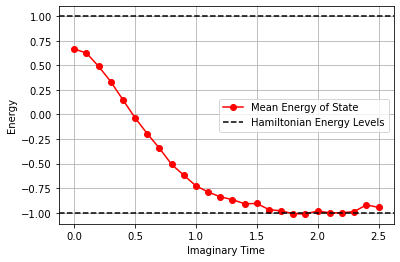

In [10]:
import matplotlib.pyplot as plt
from helper import get_spectrum
%matplotlib inline

p1, = plt.plot(np.arange(0,N+1)*db, E, 'ro-')

w,v = get_spectrum(hm_list, nbits)
for energy_level in w:
    p2 = plt.axhline(y=energy_level, color='k', linestyle='--')

plt.legend((p1,p2), ('Mean Energy of State', 'Hamiltonian Energy Levels'), loc='best')

plt.xlabel('Imaginary Time')
plt.ylabel('Energy')
plt.grid()

plt.savefig('one-qubit')
plt.show()

In [3]:
from helper import get_h_matrix
import numpy as np

get_h_matrix(hm_list,nbits)

array([[ 0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j]])

In [4]:
hm_list

[[[3], [0.7071067811865476], [0]], [[1], [0.7071067811865476], [0]]]

In [13]:
from helper import int_to_base, sigma_matrices
num_basis = 2**nbits
h_mat = np.zeros([num_basis, num_basis],dtype=complex)

for hm in hm_list:
    active = hm[2]
    nactive = len(active)
    nterms = len(hm[0])
    
    for i in range(nterms):
        full_pauli_str = [0] * nbits
        partial_pauli_str = int_to_base(hm[0][i],4,nactive)
        for j in range(len(active)):
            full_pauli_str[active[j]] = partial_pauli_str[j]
        full_pauli_str = full_pauli_str[::-1]
        
        term_matrix = sigma_matrices[full_pauli_str[0]]
        for j in range(1,nbits):
            term_matrix = np.kron(term_matrix, sigma_matrices[full_pauli_str[j]])
        term_matrix *= hm[1][i]
        print(term_matrix)

[[ 0.04419417+0.j  0.        +0.j]
 [ 0.        +0.j -0.04419417+0.j]]
[[0.        +0.j 0.04419417+0.j]
 [0.04419417+0.j 0.        +0.j]]


In [16]:
for j in range(1,1):
    print(j)